実装にあたってこちらの記事を参考にさせていただきました  
[Zenn 歩行時の加速度,角速度データから歩行軌跡を描いてみた - Beyond Toyama](https://zenn.dev/happy663/articles/1a0abc285b3a33)

# 事前準備

## ライブラリのインポート

In [19]:
%pip install japanize_matplotlib
%pip install pandas
%pip install scipy


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 30.3 MB 2.9 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from scipy import signal
from scipy.signal import find_peaks

## センサデータの取得

In [21]:
acc_file_path = "https://raw.githubusercontent.com/kanakanho/kajilab-PDR/main/data/acc.csv"
gyro_file_path = "https://raw.githubusercontent.com/kanakanho/kajilab-PDR/main/data/gyro.csv"

# 通信してデータを取得
df_acc = pd.read_csv(acc_file_path)
df_gyro = pd.read_csv(gyro_file_path)

# センサデータの加工

## ウィンドウの宣言

In [22]:
window_acc = 400
window_pre = 240
window_gayo = 200
shift_amount = window_pre * -1

## 生データの描画

<Figure size 640x480 with 0 Axes>

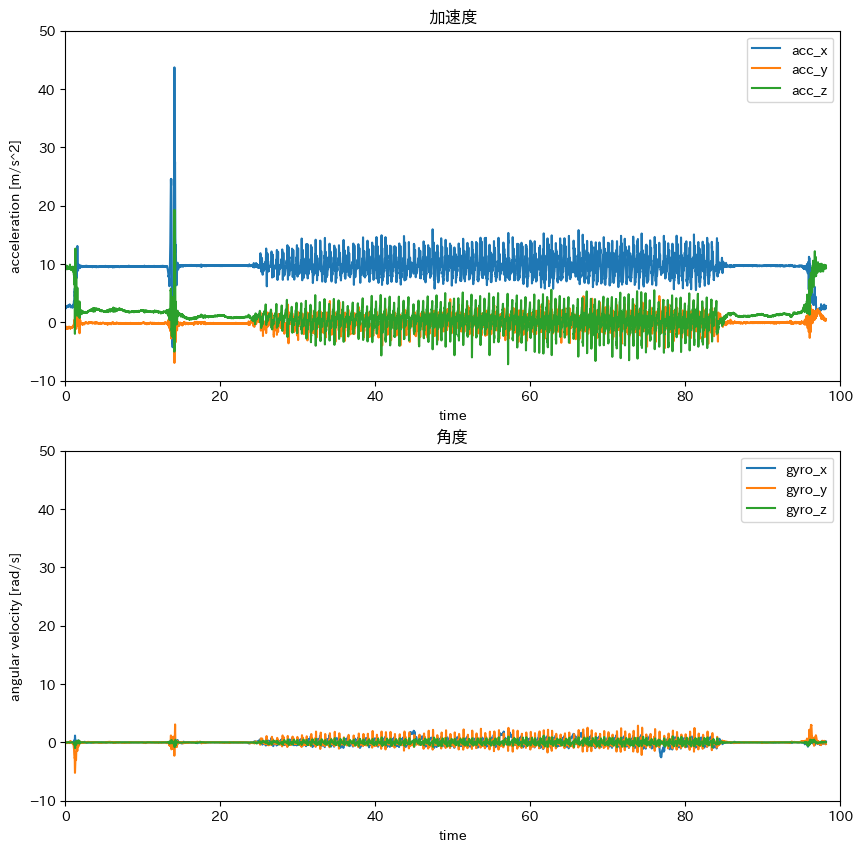

In [24]:
plt.subplots_adjust(hspace=0.3)
fig = plt.figure(figsize=(10, 10))

# 加速度のプロット
ax1 = fig.add_subplot(2,1,1)
ax1.title.set_text("加速度")
ax1.plot(df_acc["t"], df_acc["x"], label="acc_x")
ax1.plot(df_acc["t"], df_acc["y"], label="acc_y")
ax1.plot(df_acc["t"], df_acc["z"], label="acc_z")
ax1.set_xlabel("time")
ax1.set_ylabel("acceleration [m/s^2]")
ax1.set_xlim(0, 100)
ax1.set_ylim(-10, 50)
ax1.legend()

# ジャイロのプロット
ax2 = fig.add_subplot(2,1,2)
ax2.title.set_text("角度")
ax2.plot(df_gyro["t"], df_gyro["x"], label="gyro_x")
ax2.plot(df_gyro["t"], df_gyro["y"], label="gyro_y")
ax2.plot(df_gyro["t"], df_gyro["z"], label="gyro_z")
ax2.set_xlabel("time")
ax2.set_ylabel("angular velocity [rad/s]")
ax2.set_xlim(0, 100)
ax2.set_ylim(-10, 50)
ax2.legend()

plt.show()

## 余分な時間のデータを消す

In [36]:
# # 20s ~ 90sのデータを抽出
df_acc = df_acc[(df_acc['t'] >= 20) & (df_acc['t'] <= 90)]
df_gyro = df_gyro[(df_gyro['t'] >= 20) & (df_gyro['t'] <= 90)]

# # index をリセット
df_acc = df_acc.reset_index(drop=True)
df_gyro = df_gyro.reset_index(drop=True)

## 整形したデータの描画

<Figure size 640x480 with 0 Axes>

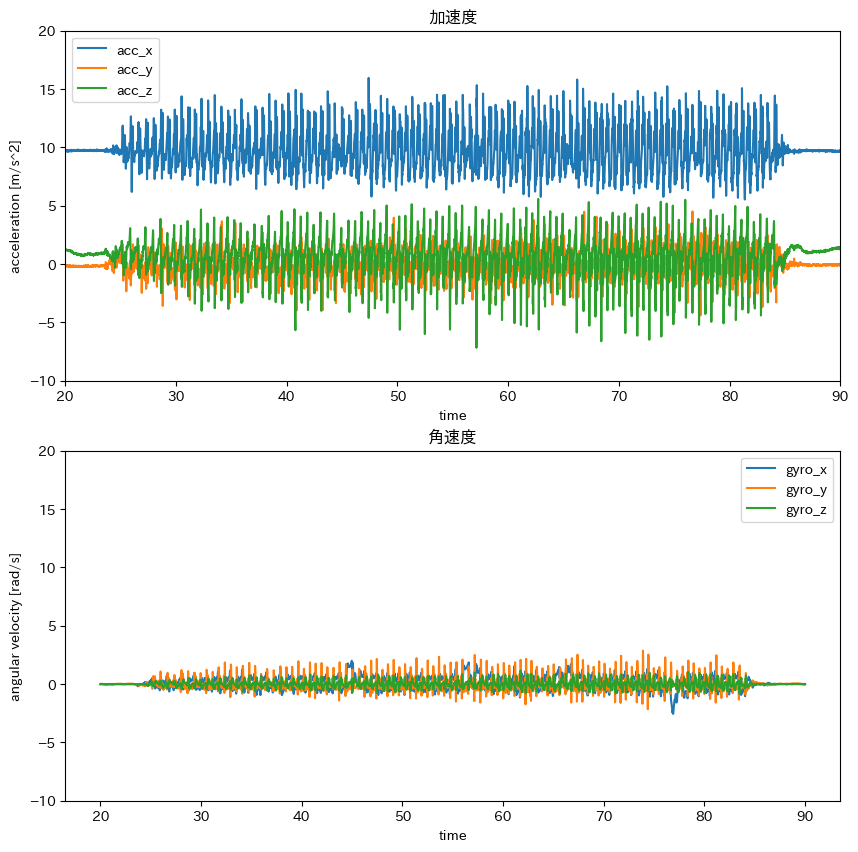

In [37]:
plt.subplots_adjust(hspace=0.3)
fig = plt.figure(figsize=(10, 10))

# 加速度のプロット
ax1 = fig.add_subplot(2,1,1)
ax1.title.set_text('加速度')
ax1.plot(df_acc["t"], df_acc["x"], label="acc_x")
ax1.plot(df_acc["t"], df_acc["y"], label="acc_y")
ax1.plot(df_acc["t"], df_acc["z"], label="acc_z")
ax1.set_xlabel("time")
ax1.set_ylabel("acceleration [m/s^2]")
ax1.set_xlim(20, 90)
ax1.set_ylim(-10, 20)
ax1.legend()

# ジャイロのプロット
ax2 = fig.add_subplot(2,1,2)
ax2.title.set_text('角速度')
ax2.plot(df_gyro["t"], df_gyro["x"], label="gyro_x")
ax2.plot(df_gyro["t"], df_gyro["y"], label="gyro_y")
ax2.plot(df_gyro["t"], df_gyro["z"], label="gyro_z")
ax2.set_xlabel("time")
ax2.set_ylabel("angular velocity [rad/s]")
ax1.set_xlim(20, 90)
ax2.set_ylim(-10, 20)
ax2.legend()

plt.show()